In [2]:
meanAP_json = "/home/tlips/Documents/diffusing-synthetic-data/dsd/experiments/run_metrics/meanAP_dict.json"
AKD_json = "/home/tlips/Documents/diffusing-synthetic-data/dsd/experiments/run_metrics/AKD_dict.json"
median_KD_json = "/home/tlips/Documents/diffusing-synthetic-data/dsd/experiments/run_metrics/median_KD_dict.json"

seg_map_json = "/home/tlips/Documents/diffusing-synthetic-data/dsd/experiments/run_metrics/seg_meanAP_dict.json"
bbox_map_json = "run_metrics/bbox_meanAP_dict.json"


In [3]:
# read the dicts
import json
with open(meanAP_json, "r") as f:
    meanAP_dict = json.load(f)
with open(AKD_json, "r") as f:
    AKD_dict = json.load(f)
with open(median_KD_json, "r") as f:
    median_KD_dict = json.load(f)

with open(seg_map_json, "r") as f:
    seg_map_dict = json.load(f)
with open(bbox_map_json, "r") as f:
    bbox_map_dict = json.load(f)
    
print(median_KD_dict)

{'REAL_MUGS_RUN': {'bottom': 13.03840446472168, 'handle': 14.866068840026855, 'top': 11.180339813232422}, 'REAL_SHOES_RUN': {'nose': 7.071067810058594, 'heel': 14.142135620117188, 'top': 9.219544410705566}, 'REAL_TSHIRTS_RUN': {'shoulder_left': 8.154234409332275, 'neck_left': 4.0, 'neck_right': 3.605551242828369, 'shoulder_right': 7.8102498054504395, 'sleeve_right_top': 3.0, 'sleeve_right_bottom': 3.605551242828369, 'armpit_right': 4.242640495300293, 'waist_right': 2.8284270763397217, 'waist_left': 2.2360680103302, 'armpit_left': 4.4721360206604, 'sleeve_left_bottom': 4.0, 'sleeve_left_top': 2.2360680103302}, 'RANDOM_TEXTURES_MUGS_RUN': {'bottom': 10.29563045501709, 'handle': 9.219544410705566, 'top': 10.440306663513184}, 'RANDOM_TEXTURES_SHOES_RUN': {'nose': 5.830951690673828, 'heel': 8.602325439453125, 'top': 7.8102498054504395}, 'RANDOM_TEXTURES_TSHIRTS_RUN': {'shoulder_left': 12.062320232391357, 'neck_left': 6.082762718200684, 'neck_right': 6.0, 'shoulder_right': 11.0, 'sleeve_righ

In [4]:
# combine the dicts into a single table
# for the akd and median, average over all channels

for key in median_KD_dict.keys():
    median_KD_dict[key]["avg"] = sum(median_KD_dict[key].values())/len(median_KD_dict[key])
for key in AKD_dict.keys():
    AKD_dict[key]["avg"] = sum(AKD_dict[key].values())/len(AKD_dict[key])


In [5]:
# combine meanAP with avg AKD and median KD into a single table
table = {}
for key in meanAP_dict.keys():
    table[key] = {"meanAP": meanAP_dict[key], "AKD": AKD_dict[key]["avg"], "median_KD": median_KD_dict[key]["avg"]}
    try:
        table[key].update({"seg_map": seg_map_dict[key], "bbox_map": bbox_map_dict[key]})
    except KeyError as e :
        print(e)
# parse the category by checking the key for keywords: must be (tshirt, shoe or mug)
for key in table.keys():
    if "tshirt" in key.lower():
        table[key]["category"] = "tshirt"
    elif "shoe" in key.lower():
        table[key]["category"] = "shoe"
    elif "mug" in key.lower():
        table[key]["category"] = "mug"
    else:
        table[key]["category"] = "unknown"

# parse the experiment , must be in (real, random, blip, gemini, class)
for key in table.keys():
    if "real" in key.lower():
        table[key]["experiment"] = "real"
    elif "random" in key.lower():
        table[key]["experiment"] = "random"
    elif "blip" in key.lower():
        table[key]["experiment"] = "prompts-blip"
    elif "gemini" in key.lower():
        table[key]["experiment"] = "prompts-gemini"
    elif "class" in key.lower():
        table[key]["experiment"] = "prompts-classname"
    elif "two_stage" in key.lower():
        table[key]["experiment"] = "two-stage"
    else:
        table[key]["experiment"] = "unknown"

In [6]:
# create pd dataframe
import pandas as pd
df = pd.DataFrame.from_dict(table, orient="index")
df = df.reset_index()
df


,index,meanAP,AKD,median_KD,seg_map,bbox_map,category,experiment
0,REAL_MUGS_RUN,0.450494,21.651866,13.028271,0.973876,0.956578,mug,real
1,REAL_SHOES_RUN,0.500529,33.650835,10.144249,0.878362,0.909028,shoe,real
2,REAL_TSHIRTS_RUN,0.676969,25.589786,4.182577,0.870013,0.901918,tshirt,real
3,RANDOM_TEXTURES_MUGS_RUN,0.512807,18.348463,9.985161,0.974222,0.990912,mug,random
4,RANDOM_TEXTURES_SHOES_RUN,0.588594,13.426885,7.414509,0.940087,0.934158,shoe,random
5,RANDOM_TEXTURES_TSHIRTS_RUN,0.577112,37.927839,6.305799,0.749613,0.767864,tshirt,random
6,PROMPT_CLASSNAME_MUGS_RUN,0.480365,22.746601,10.878651,0.981877,0.975818,mug,prompts-classname
7,PROMPT_CLASSNAME_SHOES_RUN,0.535737,23.357621,8.931762,0.896552,0.877385,shoe,prompts-classname
8,PROMPT_CLASSNAME_TSHIRTS_RUN,0.433131,66.361937,13.634571,0.770320,0.806879,tshirt,prompts-classname
9,PROMPT_GEMINI_MUGS_RUN,0.475117,17.413992,10.797770,0.990651,0.993861,mug,prompts-gemini


# Prompt Experiments

## Keypoints

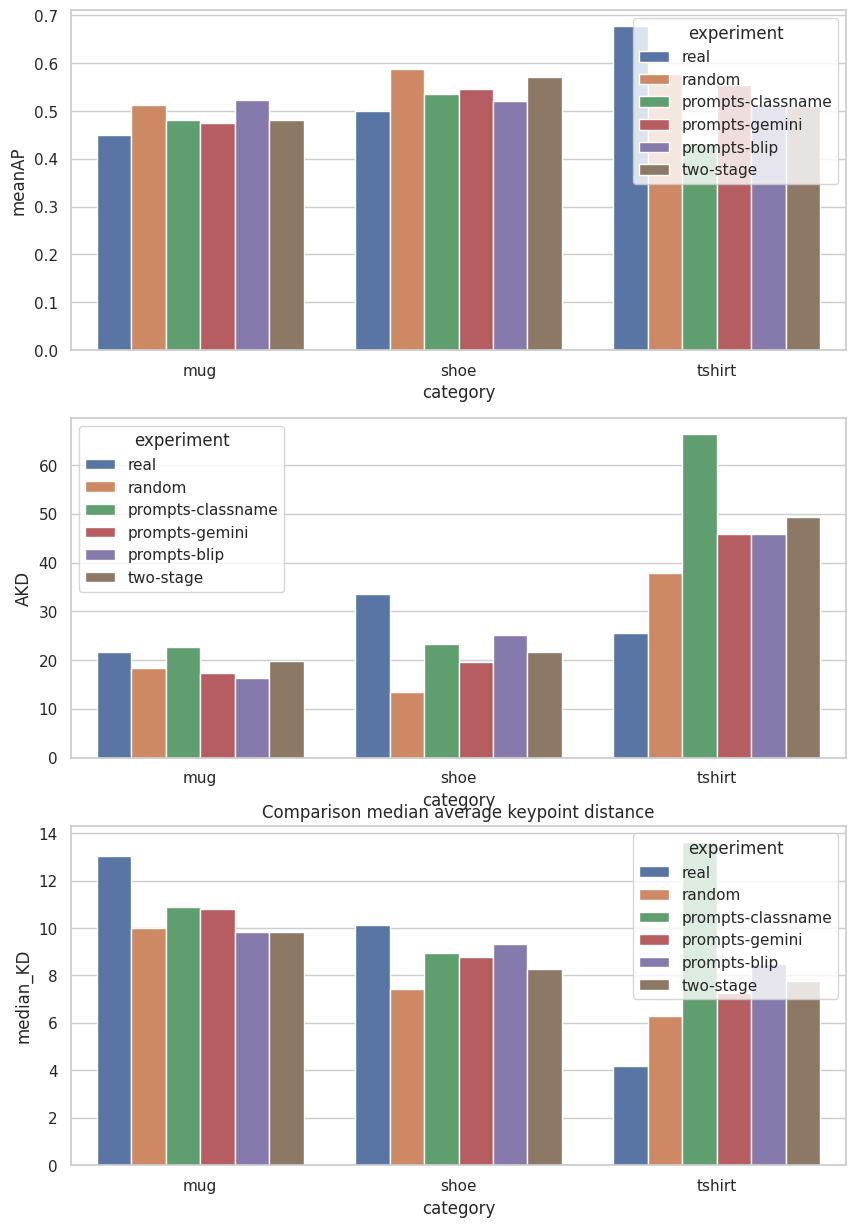

In [7]:
# create a barplot comparing the meanAP, AKD and median KD for each category
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x="category", y="meanAP", hue="experiment", data=df, ax=ax[0])
plt.title("Comparison of meanAP")
sns.barplot(x="category", y="AKD", hue="experiment", data=df, ax=ax[1])
plt.title("Comparison average average keypoint distance")
sns.barplot(x="category", y="median_KD", hue="experiment", data=df, ax=ax[2])
plt.title("Comparison median average keypoint distance")
plt.show()

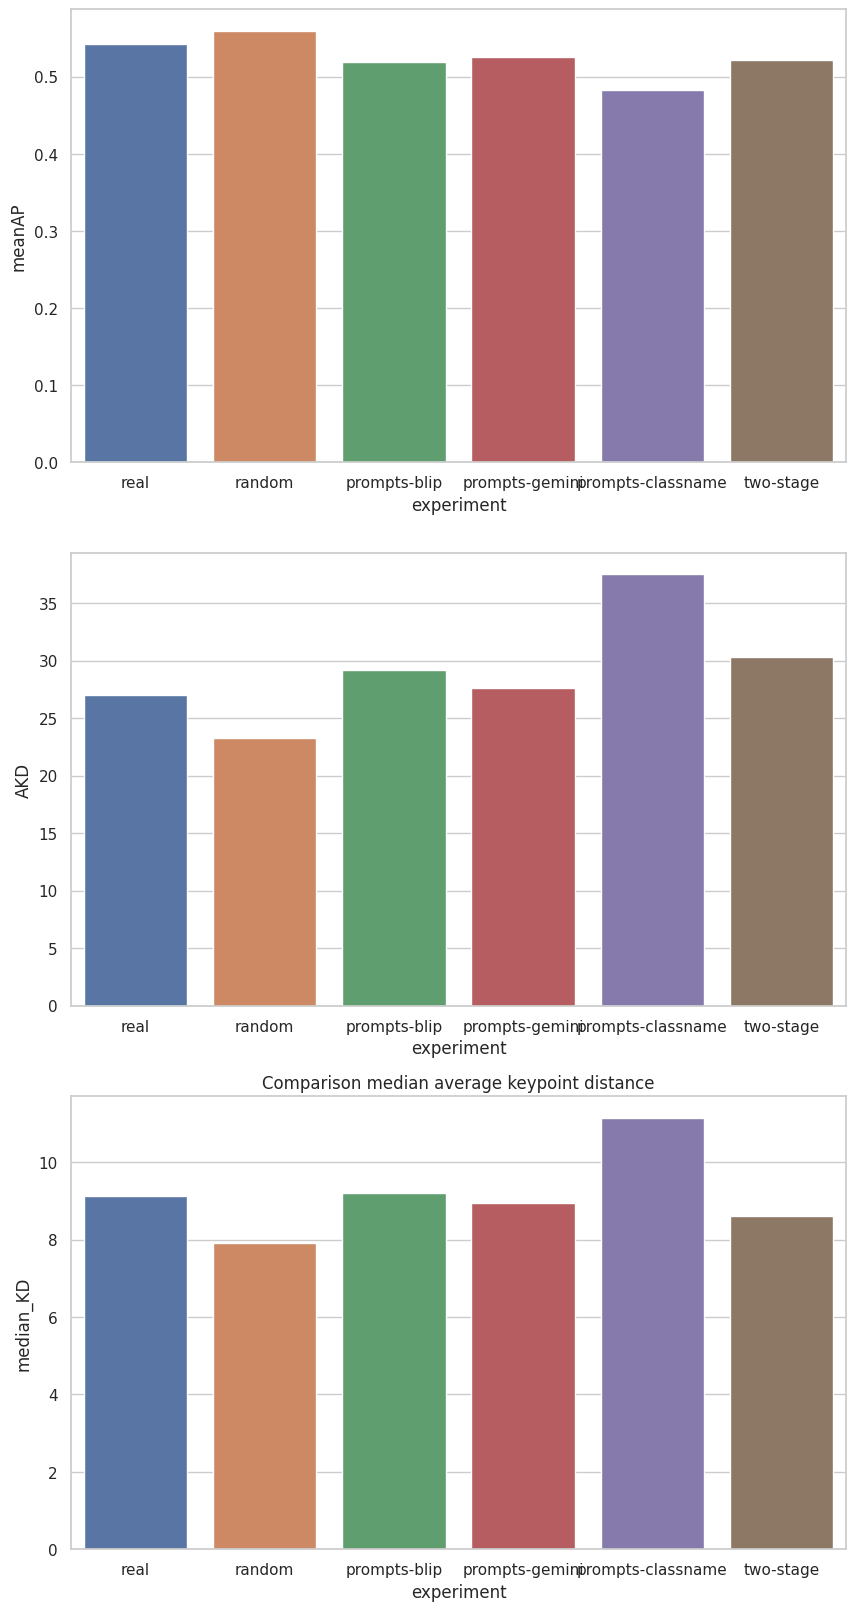

In [8]:
# create similar barchart but average accross the categories, use same color coding
df_avg = df.groupby("experiment").mean(numeric_only=True).reset_index()

# put the real experiments on the left, and the prompts on the right
df_avg = df_avg.sort_values(by="experiment", key=lambda x: x.map({"real":0, "random":1, "prompts-blip":2, "prompts-gemini":3, "prompts-classname":4}))

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
sns.barplot(x="experiment", y="meanAP", data=df_avg, ax=ax[0],hue="experiment")
sns.barplot(x="experiment", y="AKD", data=df_avg, ax=ax[1],hue="experiment")
plt.title("Comparison average average keypoint distance")
sns.barplot(x="experiment", y="median_KD", data=df_avg, ax=ax[2],hue="experiment")
plt.title("Comparison median average keypoint distance")
plt.show()

# PRompt experiments

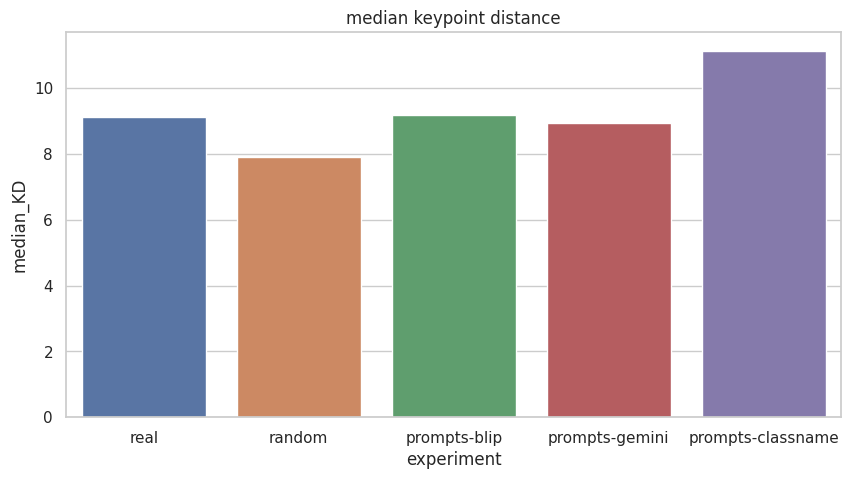

In [9]:
# only plot the median distance
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# select "prompt" experfiments, "real" and "random" in the dataframe
df_prompts = df_avg[df_avg["experiment"].str.contains("prompts") | df_avg["experiment"].str.contains("real") | df_avg["experiment"].str.contains("random")]

sns.barplot(x="experiment", y="median_KD", data=df_prompts, ax=ax,hue="experiment")
plt.title("median keypoint distance")
plt.show()

Text(0.5, 1.0, 'Segmentation mAP')

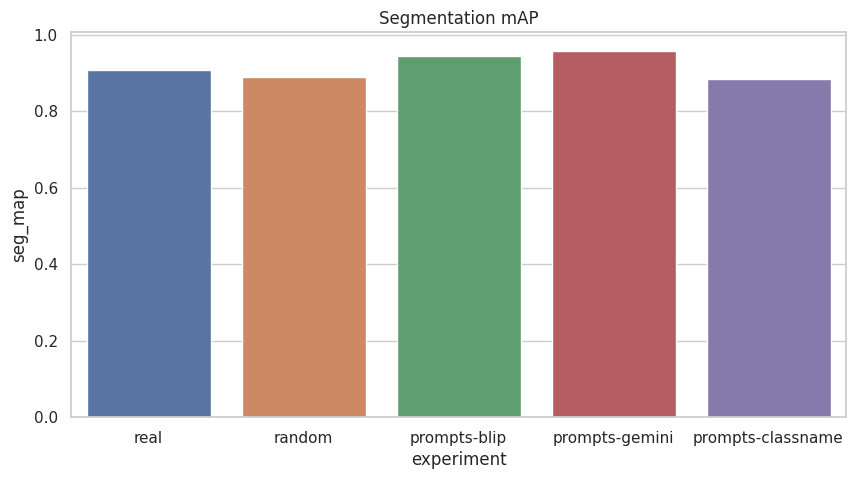

In [10]:
# seg map 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="seg_map", data=df_prompts, ax=ax,hue="experiment")
plt.title("Segmentation mAP")

# 2 stage   

In [11]:
df_two_stage = df_avg[df_avg["experiment"].str.contains("two-stage") | df_avg["experiment"].str.contains("real") | df_avg["experiment"].str.contains("random") | df_avg["experiment"].str.contains("gemini")]

Text(0.5, 1.0, 'keypoint distance')

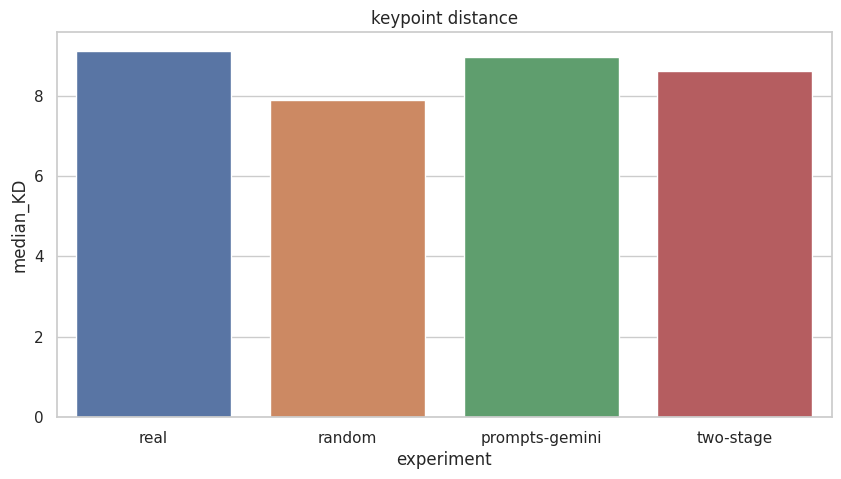

In [12]:
# plot median KD for two-stage
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="median_KD", data=df_two_stage, ax=ax,hue="experiment")
plt.title("keypoint distance")


Text(0.5, 1.0, 'Segmentation mAP')

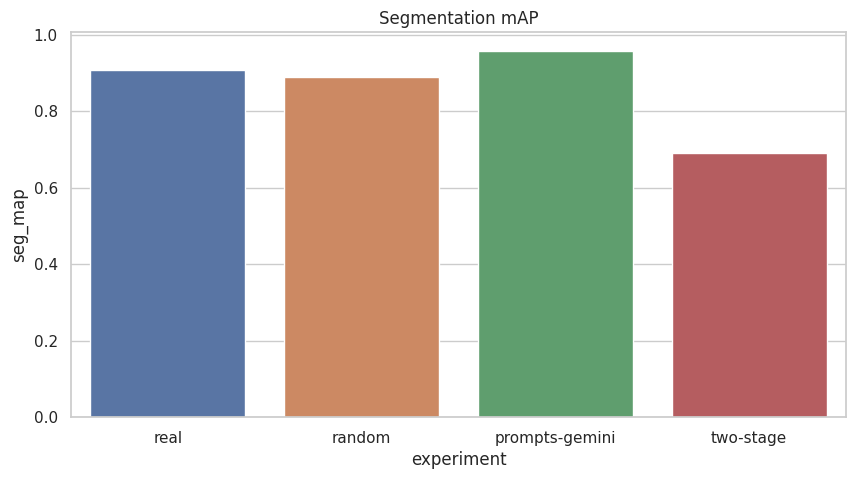

In [13]:
# seg map 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="seg_map", data=df_two_stage, ax=ax,hue="experiment")
plt.title("Segmentation mAP")

Text(0.5, 1.0, 'Segmentation mAP')

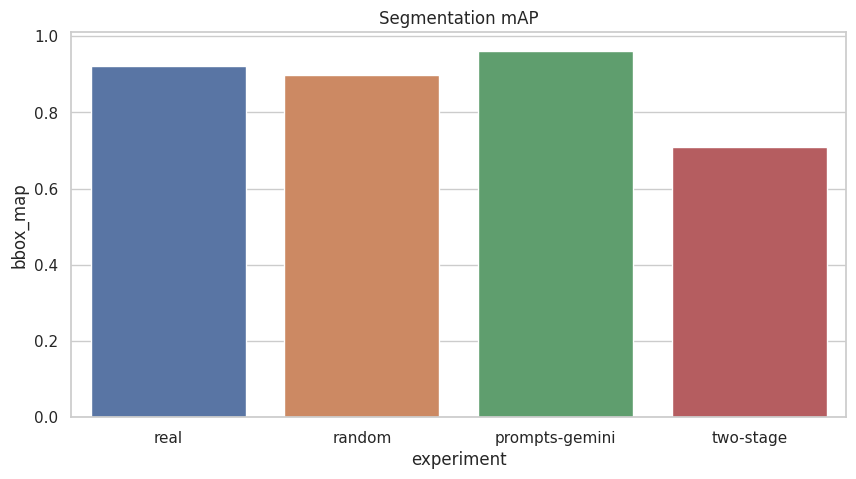

In [14]:
# seg map 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x="experiment", y="bbox_map", data=df_two_stage, ax=ax,hue="experiment")
plt.title("Segmentation mAP")